### Feature Selection

In [4]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Cleaned_Dataset_Algerian_forest.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df = df.drop(['month','day','year'],axis=1) 
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

# Fire = 1
# Not Fire  = 0 

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
# Segregating the Independent Feature and Dependent Features
X = df.drop(['FWI'],axis=1)
y = df['FWI']

In [9]:
# Train Test Split : 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

X_train.shape , X_test.shape

((182, 11), (61, 11))

In [10]:
# Feature Selection Based On Coorelation : 
corr_matrix = X_train.corr()
corr_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [11]:
(corr_matrix.iloc[0:6,0:5]) # last value is exclusive

,Temperature,RH,Ws,Rain,FFMC
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807


In [12]:
# Feature Selection Based on Some threshold values set by our Domain Manager : 
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): # This takes the column name from the list
        for j in range(i):                      # Every Value will be checked here
            if abs(corr_matrix.iloc[i,j]) > threshold:  # The abs value will return the non - negative part of the matrix
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [13]:
corr_features = correlation(X_train,0.85)

In [14]:
# Drop features when correlation is more than the set threshold value
# Dropping Features from both
X_train.drop(corr_features,axis = 1 , inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [15]:
X_train.shape , X_test.shape # Two Coloumns have been Dropped Systematically

((182, 9), (61, 9))

In [16]:
# Standard Scaler Tebchinque to make the datapoints var = 1 and mean as 0 
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Text(0.5, 1.0, ' X_Train After Standardization')

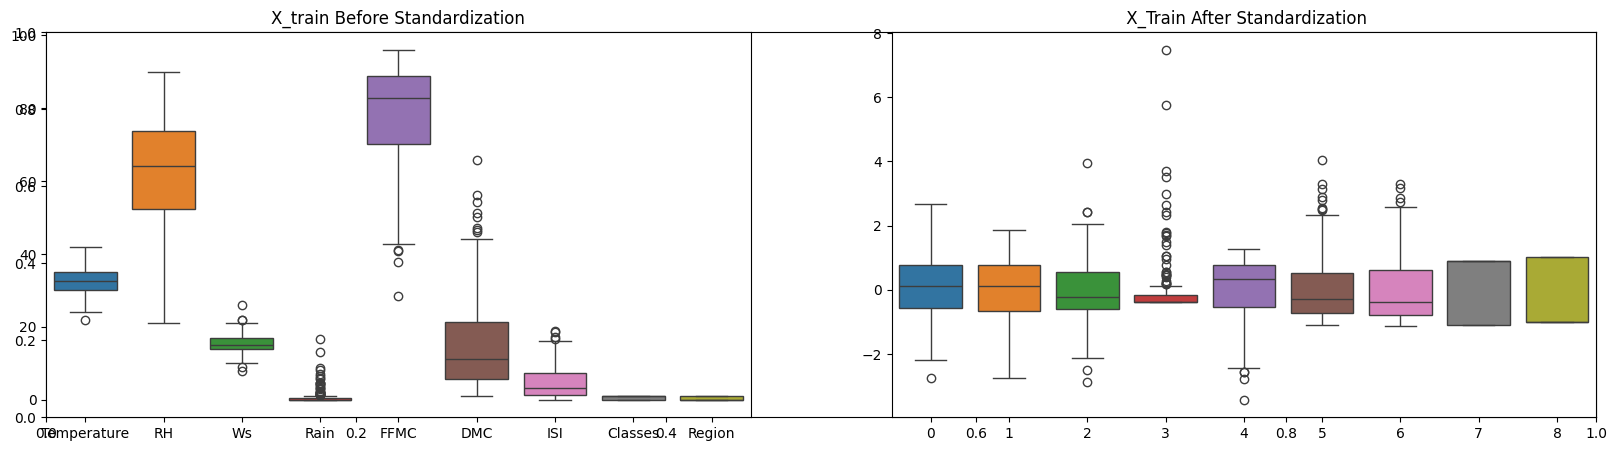

In [17]:
# Box Plot to understand th effect of standard scaler
plt.subplots(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title(' X_Train After Standardization')

### Linear Regression Model Training

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae}')
print(f'Coefficient of Determination : {score}')

Mean Absolute Error : 0.5468236465249978
Coefficient of Determination : 0.9847657384266951


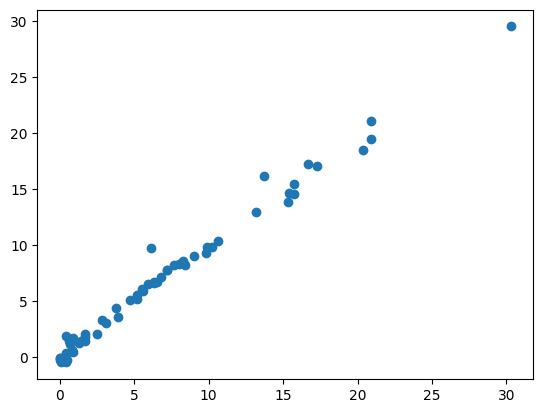

In [19]:
# Using Scatter Plot For Visulaixation : 
residual = y_test - y_pred
# Using Dislot - if Normal Distribution - then the model can be said as fine
plt.scatter(y_test,y_pred)

Mean Absolute Error : 1.133175994914409
Coefficient of Determination : 0.9492020263112388


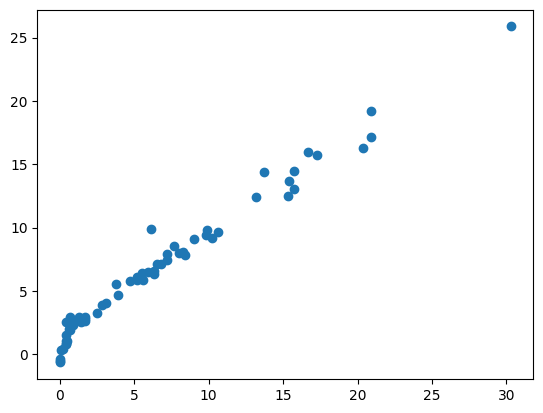

In [20]:
# Applying Lasso Regression [l2 - Regularization] to avoid Overfitting : the model :
# Lasso - It is used For Feature Selection : 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae}')
print(f'Coefficient of Determination : {score}')

plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error : 0.5642305340105715
Coefficient of Determination : 0.9842993364555512


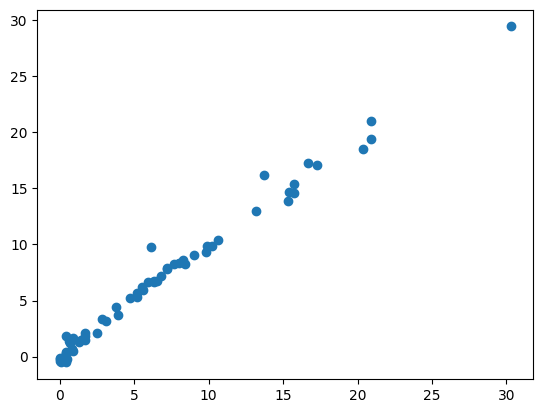

In [21]:
# Applying the Ridge Regression :  This reduces the Overfitting 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae}')
print(f'Coefficient of Determination : {score}')

plt.scatter(y_test,y_pred)
plt.show()


Mean Absolute Error : 1.8822353634896005
Coefficient of Determination : 0.8753460589519703


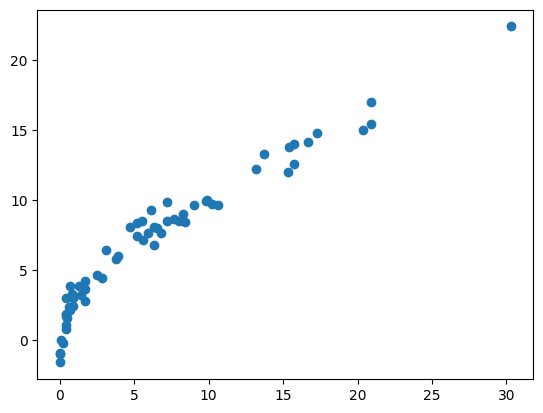

In [22]:
# Applying The Elastic Net : Mixture of Both Ridge and Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
enet = ElasticNet()
enet.fit(X_train_scaled,y_train)
y_pred = enet.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae}')
print(f'Coefficient of Determination : {score}')

plt.scatter(y_test,y_pred)
plt.show()

### Hyperparameter Tuning - Every Attribute is Important

Mean Absolute Error : 0.619970115826343
Coefficient of Determination : 0.9820946715928275


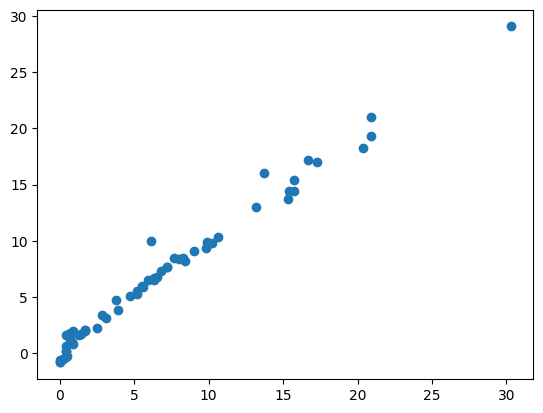

In [23]:
# Cross Validation with Lasso Regression
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae}')
print(f'Coefficient of Determination : {score}')

plt.scatter(y_test,y_pred)
plt.show()

In [24]:
# Pickle File : 
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))  # Scaler - Standar Scaler class
pickle.dump(ridge,open('ridge.pkl','wb'))  # Ridge = Ridge regression